/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


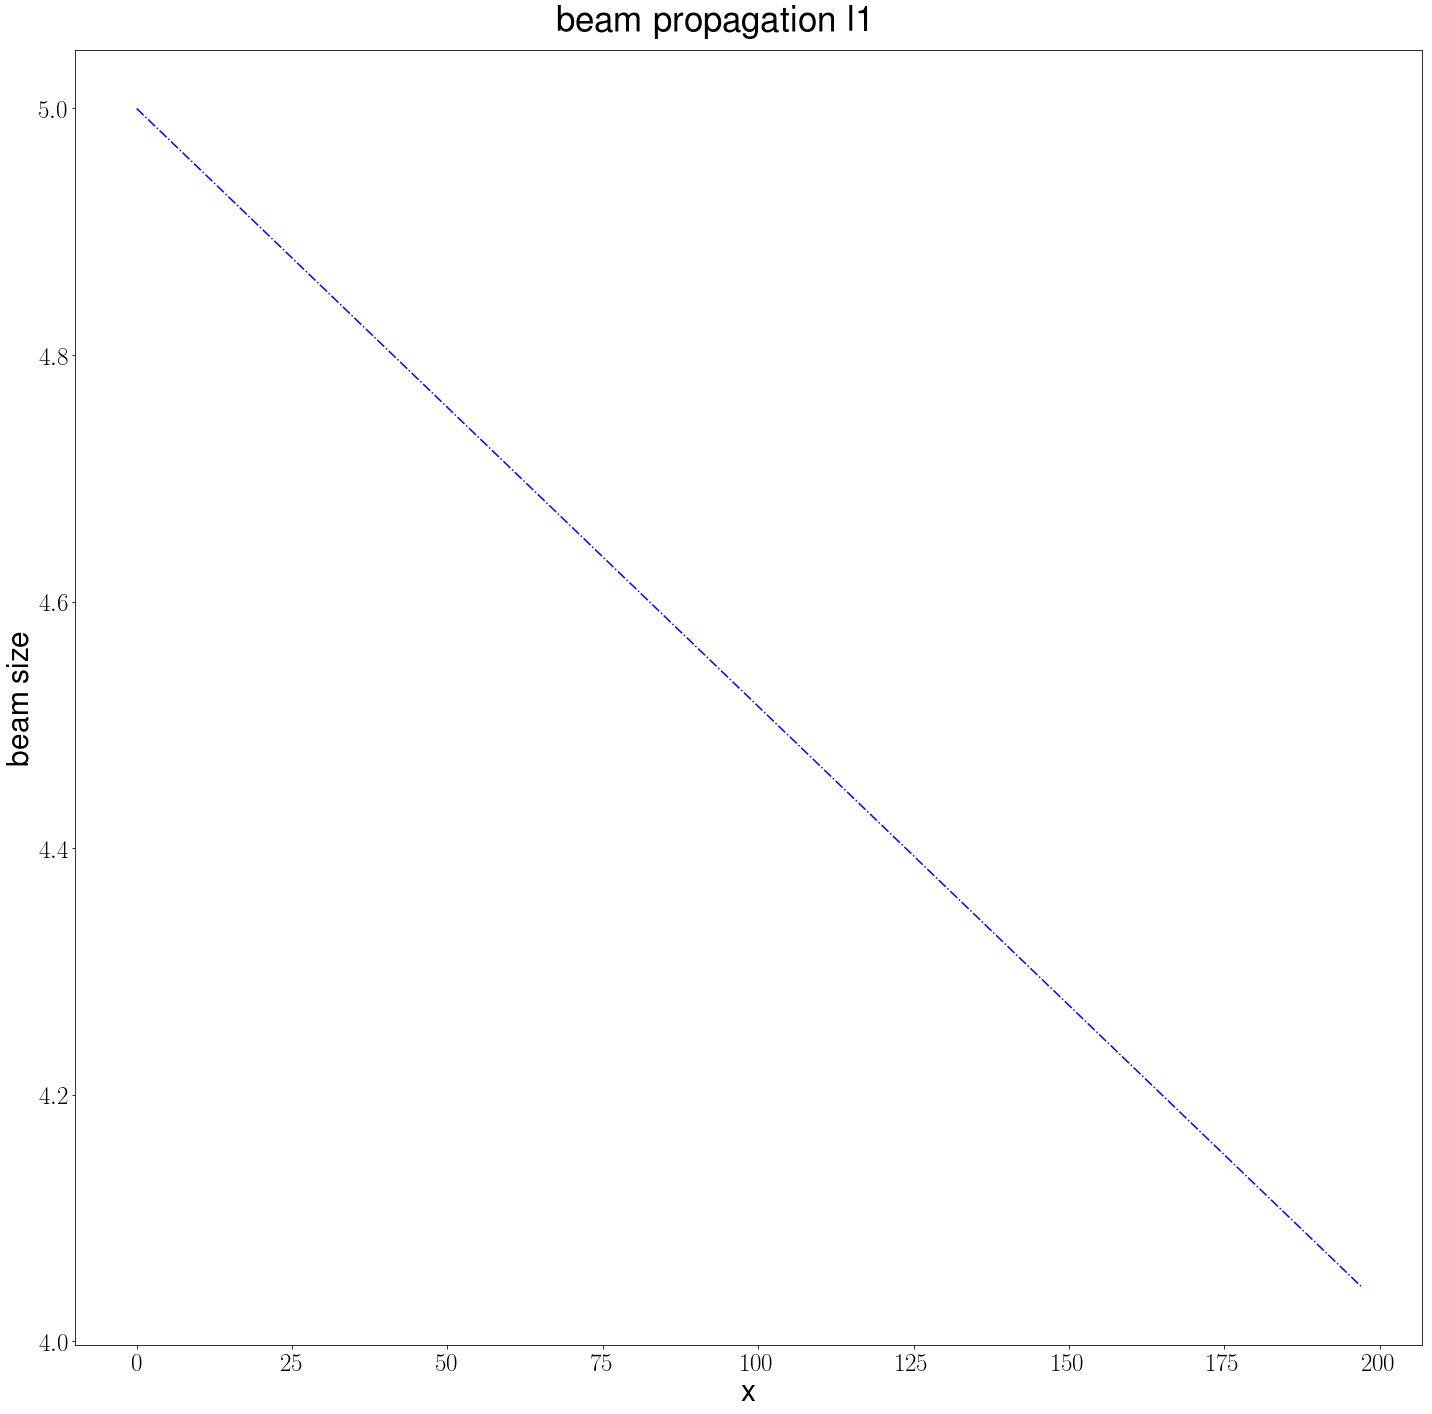

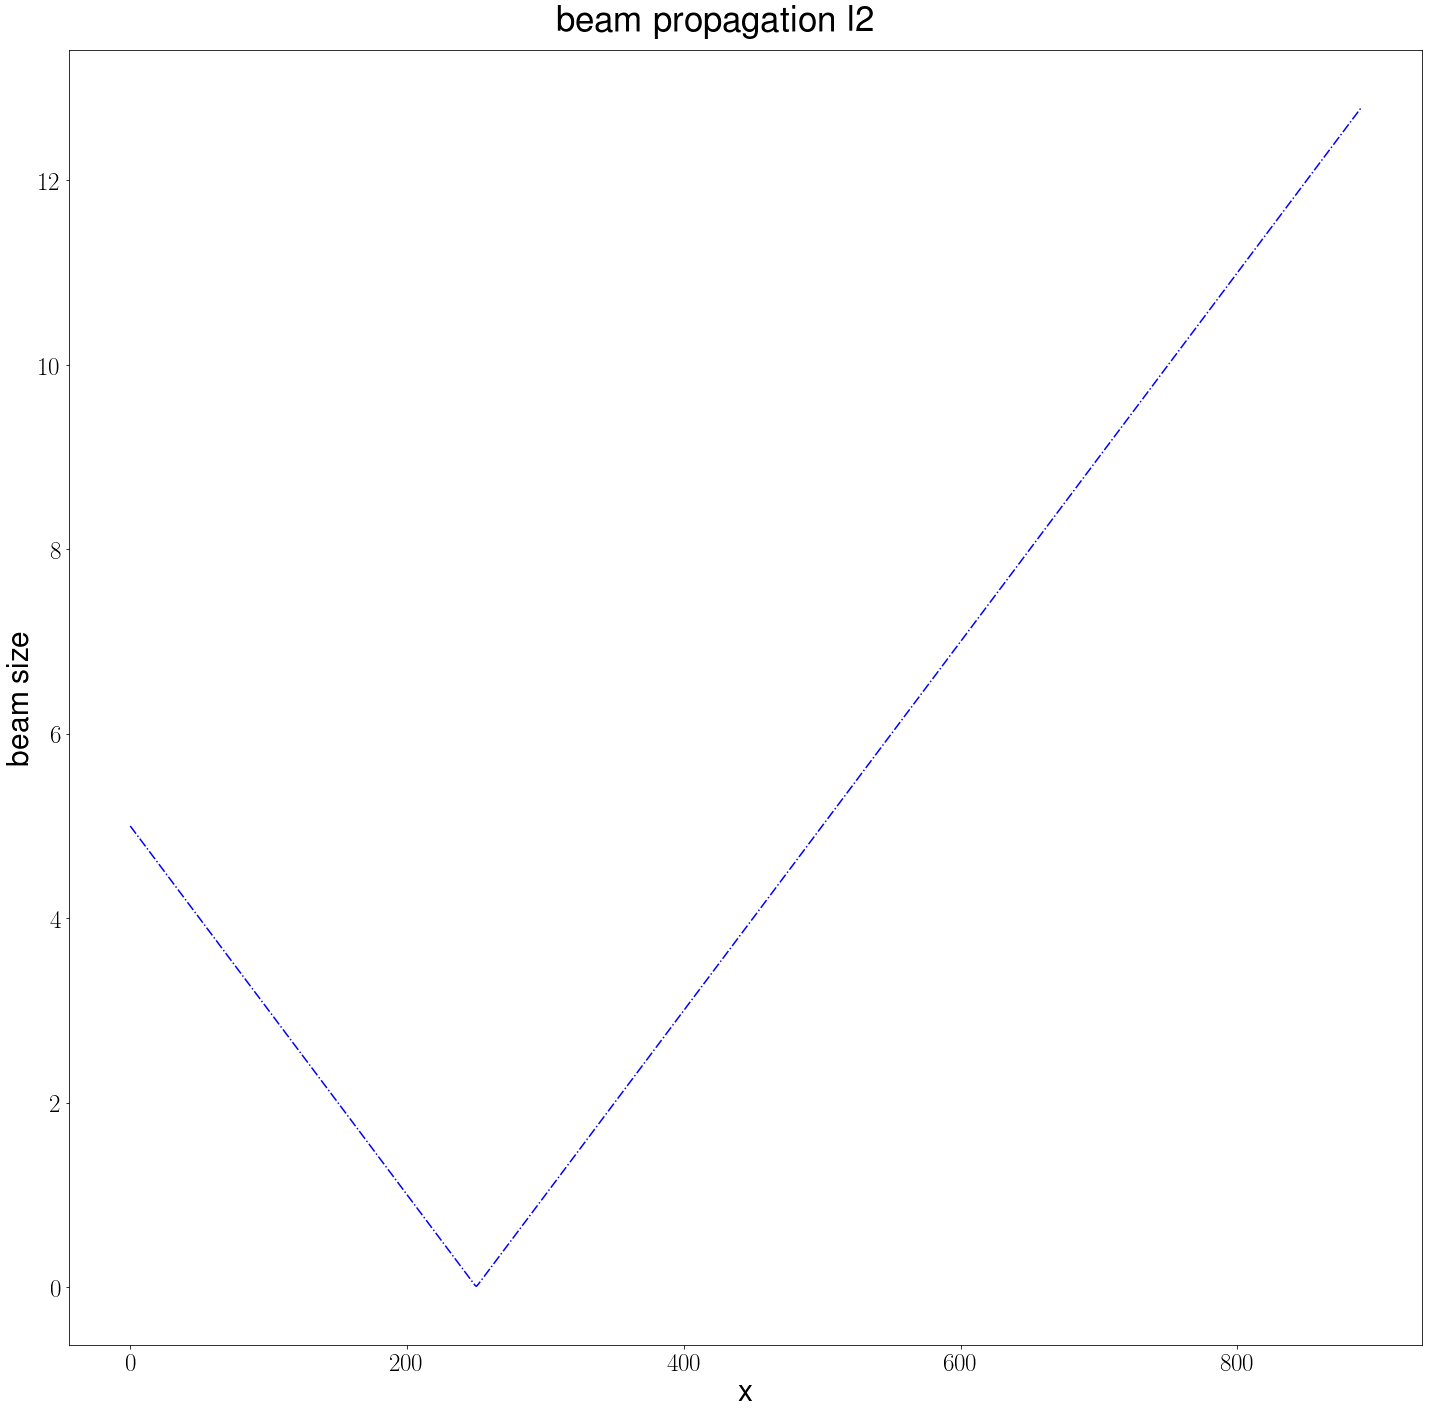

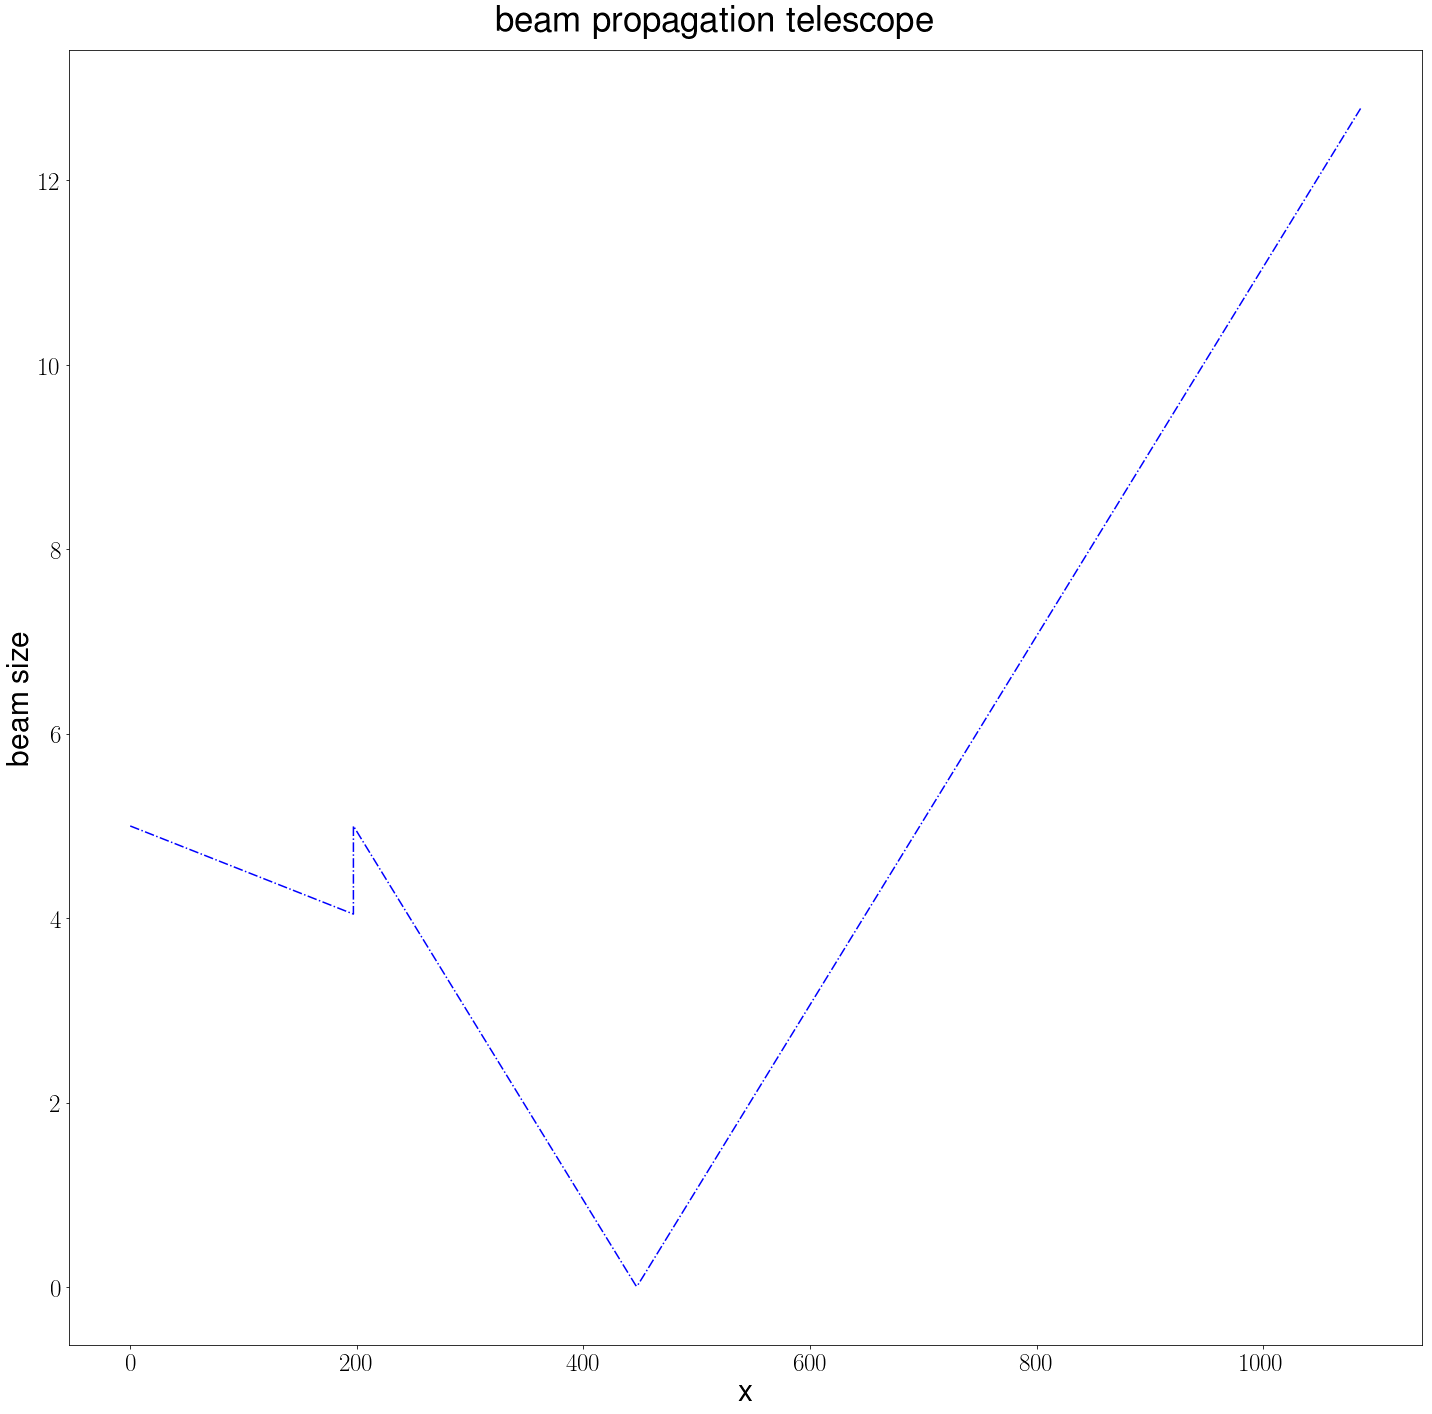

In [15]:
"""
You have the following situation: 

a plano-convex mirror, 

f1 = 1013 mm (according to a quick search)
f2 = 250 mm

then you have for the next segment

f3 = 1600 mm 
f4 = f5 = 6200 mm


we are going to do a simulation of the transport, and focus on what waist size should be at the end


we assume perfect mirrors so transmission is well defined and no loss is on the reflected surface

distance between M1-M2 is 2095 mm


"""

%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'
from datetime import *
import sys

max_loc_l1 = 197 # this is where l2 is
max_loc_l2 = 1086
xposl1 = np.arange(0, max_loc_l1, 0.01)
xposl2 = np.arange(0,max_loc_l2-max_loc_l1, 0.01 )


fl_l1= 1030.9
f2_l2 = 250

#propahation on x l1:

l1_prop = lens_waist_size(xposl1, 5, 600, 1030.9)
l2_prop = lens_waist_size(xposl2, 5, 600, 250)
def my_plot(x, y, figx, figy, fontsize, labelx, labely, title, filename):
    cycol = cycle('bgrcmk')
    fig = plt.figure(figsize=(figx,figy))
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(x, y, c = next(cycol), linestyle = '-.')
    axes.tick_params(axis='both',labelsize=fontsize)
    axes.legend(fontsize =fontsize)
    axes.set_xlabel(str(labelx), fontsize=fontsize+10)
    axes.set_ylabel(str(labely), fontsize=fontsize+10)
    axes.tick_params(axis='both',labelsize=fontsize+5)
    axes.legend(loc = 'upper right', fontsize=fontsize)
    
    fig.suptitle(title, fontsize=fontsize+15)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    fig.savefig(str(filename) + "-" + datetime.now().strftime("%Y-%m-%d-%H-%M-%S")+'.jpg', dp1=1600)

my_plot(xposl1, l1_prop, 20, 20, 20, 'x', 'beam size', 'beam propagation l1', 'test1')
my_plot(xposl2, l2_prop, 20, 20, 20, 'x', 'beam size', 'beam propagation l2', 'test1')

total_ev= []

for i in l1_prop:
    total_ev.append(i)
for i in l2_prop:
    total_ev.append(i)

totalx = np.arange(0, max_loc_l2, 0.01)

my_plot(totalx, total_ev, 20, 20, 20, 'x', 'beam size', 'beam propagation telescope', 'telescope')
